In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import tensorflow as tf

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
driver_ids = pd.read_csv("driver_ids.csv")
ride_ids = pd.read_csv("ride_ids.csv")
ride_timestamps = pd.read_csv("ride_timestamps.csv")

In [11]:
ride_ids.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [4]:
driver_ids.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [5]:
ride_timestamps.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


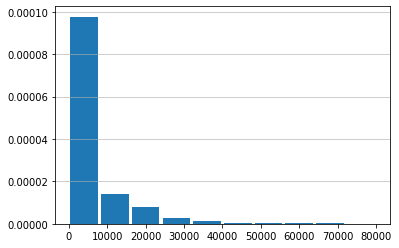

In [43]:
distance = ride_ids['ride_distance']
x,bins,p = plt.hist(ride_ids['ride_distance'], bins=10, range = [0,80000], rwidth = 0.9, density = True)
plt.grid(axis='y', alpha=0.75)

plt.show()

In [48]:
merged_rides = pd.merge(ride_ids, ride_timestamps, on='ride_id')
merged_rides

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,accepted_at,2016-04-23 02:14:15
2,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,arrived_at,2016-04-23 02:16:36
3,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,picked_up_at,2016-04-23 02:16:40
4,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,dropped_off_at,2016-04-23 02:22:07
5,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:00:49
6,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,accepted_at,2016-03-29 19:00:52
7,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,arrived_at,2016-03-29 19:03:57
8,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,picked_up_at,2016-03-29 19:04:01
9,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,dropped_off_at,2016-03-29 19:17:30


In [54]:
print(shape(driver_ids))
merged_rides['driver_id'][0]

(937, 2)


'002be0ffdc997bd5c50703158b7c2491'

In [37]:
def calculateFare(rides):
    base_fare = 2
    cpmile = 1.15
    cpminute = 0.22
    service_fee = 1.75
    min_fare = 5
    max_fare = 400
    
    fare = []
    for rows in rides.iterrows():
        value = base_fare + (rows[1]['ride_distance']/1609.34) * cpmile + (rows[1]['ride_duration']/60)*cpminute
        value = value + (value * rows[1]['ride_prime_time']/100) + service_fee 
        if value < min_fare:
            value = min_fare
        if value > max_fare:
            value = max_fare
        fare.append(value)
        
    rides['fare'] = fare
    

In [38]:
calculateFare(ride_ids)

In [39]:
ride_ids

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,fare
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.489653
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.118747
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.192580
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,77.861464
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,17.666316
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,19.380355
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0,6.147795
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25,10.128440
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75,17.511270
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50,13.765382


In [58]:
def calculateDriverValue(driverID):
    all_driver_fare = []
    for row in driverID.iterrows():
        driver_all_rides = ride_ids[ride_ids['driver_id'] == row[1]['driver_id']]
        driver_all_fares = 0
        for row2 in driver_all_rides.iterrows():
            driver_all_fares = driver_all_fares + row2[1]['fare']
        all_driver_fare.append(driver_all_fares)
    driverID['total_fare'] = all_driver_fare
    return driverID

In [59]:
driver_with_value = calculateDriverValue(driver_ids)

[3560.9260705589463, 321.49494808637905, 482.42839029664333, 2610.871561072656, 5381.097538957998, 0, 2941.1602416808537, 686.2421109616364, 4279.8713747022575, 5197.530993089297, 1566.0743668128962, 784.33146241627, 2953.658620261517, 470.5467214572434, 4866.38754435358, 2916.469615748274, 4852.063351747712, 503.0933050826218, 885.7616943954248, 4563.3168645366, 736.6031070449167, 504.7018832274929, 4840.677671858235, 710.408520863625, 4469.222453966633, 558.0391428950171, 4922.7684853884275, 3418.645870810396, 252.88716453432255, 2164.3281362991443, 399.1848484409757, 8115.050441499833, 7619.67462153533, 390.54456049063594, 577.6439565815801, 5572.075877288207, 450.0640028013554, 5328.586360990633, 4016.156236969813, 3183.4871463643494, 498.76678075277226, 4008.2924726005713, 4237.469819263387, 463.0240837165131, 599.3259197517823, 7465.2747773818255, 6024.480824209507, 5571.933764519405, 524.0836625624997, 735.6483007847938, 316.1655959192381, 598.9627721622942, 5975.3436563322075, 

In [60]:
driver_with_value

,driver_id,driver_onboard_date,total_fare
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3560.926071
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,321.494948
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,482.428390
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2610.871561
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5381.097539
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00,0.000000
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00,2941.160242
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00,686.242111
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00,4279.871375
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00,5197.530993


In [ ]:
calculateLifeTime(driverID):
    for row in driverID.iterrows():

In [61]:
year = datetime_year('2019-08-23')

NameError: name 'datetime_year' is not defined

In [63]:
driver_with_value.dtypes

driver_id               object
driver_onboard_date     object
total_fare             float64
dtype: object